In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

# Load in csv from Data Cleaning

In [2]:
wrangled_data = pd.read_csv('wrangled_data.csv')
wrangled_data.shape

(99984, 90)

In [3]:
wrangled_data.head()

,Unnamed: 0,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,last_fico_range
0,1592860,15000.0,36 months,6.71,461.18,A,A3,Truck driver,10+ years,RENT,28000.0,Source Verified,Apr-2018,Fully Paid,car,941xx,CA,10.66,0.0,Feb-1996,804.0,0.0,0.0,0.0,19.0,0.0,6.2,33.0,f,Jan-2019,0.0,0.0,Individual,0.0,0.0,7168.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,6477.0,6.0,114700.0,0.0,0.0,1.0,5.0,377.0,95032.0,7.0,0.0,0.0,0.0,266.0,3.0,3.0,0.0,3.0,0.0,7.0,0.0,0.0,5.0,5.0,15.0,24.0,0.0,19.0,33.0,5.0,19.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,114700.0,7168.0,102200.0,0.0,N,4.0
1,1019497,3000.0,36 months,11.99,99.63,C,C1,cook,2 years,RENT,40000.0,Not Verified,Mar-2016,Fully Paid,debt_consolidation,600xx,IL,13.86,0.0,Oct-2003,664.0,2.0,0.0,55.0,8.0,4.0,26.9,14.0,w,Mar-2019,1.0,0.0,Individual,0.0,64.0,16375.0,1.0,1.0,0.0,1.0,16.0,14383.0,87.0,1.0,6.0,636.0,68.0,7400.0,3.0,0.0,5.0,7.0,2339.0,4137.0,27.4,0.0,0.0,124.0,149.0,3.0,3.0,1.0,21.0,0.0,2.0,0.0,0.0,3.0,5.0,3.0,6.0,2.0,7.0,11.0,5.0,8.0,0.0,0.0,0.0,1.0,100.0,0.0,2.0,2.0,24025.0,16375.0,5700.0,16625.0,N,4.0
2,2072955,12000.0,60 months,19.03,311.49,D,D3,Underwriting Director,10+ years,MORTGAGE,136000.0,Source Verified,Dec-2017,Fully Paid,home_improvement,970xx,OR,18.52,0.0,Sep-2003,704.0,0.0,42.0,0.0,9.0,0.0,61.7,18.0,w,Mar-2019,0.0,0.0,Individual,0.0,0.0,305905.0,1.0,2.0,2.0,2.0,5.0,53293.0,24.0,0.0,0.0,25017.0,49.0,44500.0,1.0,1.0,1.0,3.0,33989.0,13062.0,67.6,0.0,0.0,59.0,170.0,44.0,5.0,5.0,44.0,0.0,8.0,42.0,0.0,4.0,5.0,4.0,4.0,6.0,6.0,7.0,5.0,9.0,0.0,0.0,0.0,3.0,94.4,25.0,0.0,0.0,344622.0,80748.0,40300.0,71795.0,N,4.0
3,1278099,9600.0,36 months,13.98,328.02,C,C3,Service Manager,< 1 year,MORTGAGE,48000.0,Verified,May-2014,Fully Paid,debt_consolidation,495xx,MI,22.15,1.0,Oct-2001,704.0,5.0,12.0,0.0,9.0,0.0,34.2,40.0,w,Mar-2019,0.0,0.0,Individual,0.0,866.0,89692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12200.0,0.0,0.0,0.0,7.0,9966.0,5101.0,17.0,0.0,0.0,95.0,150.0,1.0,1.0,2.0,1.0,0.0,1.0,12.0,0.0,3.0,6.0,4.0,19.0,2.0,7.0,36.0,6.0,9.0,0.0,0.0,0.0,3.0,97.4,0.0,0.0,0.0,120528.0,7377.0,6600.0,22068.0,N,4.0
4,1870253,30000.0,36 months,16.29,1059.02,C,C4,ABM,10+ years,RENT,142850.0,Verified,Mar-2013,Fully Paid,debt_consolidation,949xx,CA,8.30,1.0,Sep-1983,664.0,0.0,9.0,0.0,7.0,0.0,87.3,21.0,f,May-2015,0.0,32.0,Individual,0.0,0.0,33047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12200.0,0.0,0.0,0.0,2.0,4721.0,365.0,96.2,0.0,0.0,150.0,358.0,12.0,9.0,3.0,12.0,24.0,0.0,9.0,1.0,3.0,5.0,3.0,6.0,6.0,5.0,10.0,5.0,7.0,0.0,0.0,0.0,2.0,71.0,66.7,0.0,0.0,43580.0,33047.0,9700.0,31380.0,N,4.0


In [4]:
wrangled_data.set_index('Unnamed: 0', inplace=True)

wrangled_data.index.names = ['Loan ID']
wrangled_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,debt_settlement_flag,last_fico_range
Loan ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1592860,15000.0,36 months,6.71,461.18,A,A3,Truck driver,10+ years,RENT,28000.0,Source Verified,Apr-2018,Fully Paid,car,941xx,CA,10.66,0.0,Feb-1996,804.0,0.0,0.0,0.0,19.0,0.0,6.2,33.0,f,Jan-2019,0.0,0.0,Individual,0.0,0.0,7168.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,6477.0,6.0,114700.0,0.0,0.0,1.0,5.0,377.0,95032.0,7.0,0.0,0.0,0.0,266.0,3.0,3.0,0.0,3.0,0.0,7.0,0.0,0.0,5.0,5.0,15.0,24.0,0.0,19.0,33.0,5.0,19.0,0.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,114700.0,7168.0,102200.0,0.0,N,4.0
1019497,3000.0,36 months,11.99,99.63,C,C1,cook,2 years,RENT,40000.0,Not Verified,Mar-2016,Fully Paid,debt_consolidation,600xx,IL,13.86,0.0,Oct-2003,664.0,2.0,0.0,55.0,8.0,4.0,26.9,14.0,w,Mar-2019,1.0,0.0,Individual,0.0,64.0,16375.0,1.0,1.0,0.0,1.0,16.0,14383.0,87.0,1.0,6.0,636.0,68.0,7400.0,3.0,0.0,5.0,7.0,2339.0,4137.0,27.4,0.0,0.0,124.0,149.0,3.0,3.0,1.0,21.0,0.0,2.0,0.0,0.0,3.0,5.0,3.0,6.0,2.0,7.0,11.0,5.0,8.0,0.0,0.0,0.0,1.0,100.0,0.0,2.0,2.0,24025.0,16375.0,5700.0,16625.0,N,4.0
2072955,12000.0,60 months,19.03,311.49,D,D3,Underwriting Director,10+ years,MORTGAGE,136000.0,Source Verified,Dec-2017,Fully Paid,home_improvement,970xx,OR,18.52,0.0,Sep-2003,704.0,0.0,42.0,0.0,9.0,0.0,61.7,18.0,w,Mar-2019,0.0,0.0,Individual,0.0,0.0,305905.0,1.0,2.0,2.0,2.0,5.0,53293.0,24.0,0.0,0.0,25017.0,49.0,44500.0,1.0,1.0,1.0,3.0,33989.0,13062.0,67.6,0.0,0.0,59.0,170.0,44.0,5.0,5.0,44.0,0.0,8.0,42.0,0.0,4.0,5.0,4.0,4.0,6.0,6.0,7.0,5.0,9.0,0.0,0.0,0.0,3.0,94.4,25.0,0.0,0.0,344622.0,80748.0,40300.0,71795.0,N,4.0
1278099,9600.0,36 months,13.98,328.02,C,C3,Service Manager,< 1 year,MORTGAGE,48000.0,Verified,May-2014,Fully Paid,debt_consolidation,495xx,MI,22.15,1.0,Oct-2001,704.0,5.0,12.0,0.0,9.0,0.0,34.2,40.0,w,Mar-2019,0.0,0.0,Individual,0.0,866.0,89692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12200.0,0.0,0.0,0.0,7.0,9966.0,5101.0,17.0,0.0,0.0,95.0,150.0,1.0,1.0,2.0,1.0,0.0,1.0,12.0,0.0,3.0,6.0,4.0,19.0,2.0,7.0,36.0,6.0,9.0,0.0,0.0,0.0,3.0,97.4,0.0,0.0,0.0,120528.0,7377.0,6600.0,22068.0,N,4.0
1870253,30000.0,36 months,16.29,1059.02,C,C4,ABM,10+ years,RENT,142850.0,Verified,Mar-2013,Fully Paid,debt_consolidation,949xx,CA,8.30,1.0,Sep-1983,664.0,0.0,9.0,0.0,7.0,0.0,87.3,21.0,f,May-2015,0.0,32.0,Individual,0.0,0.0,33047.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12200.0,0.0,0.0,0.0,2.0,4721.0,365.0,96.2,0.0,0.0,150.0,358.0,12.0,9.0,3.0,12.0,24.0,0.0,9.0,1.0,3.0,5.0,3.0,6.0,6.0,5.0,10.0,5.0,7.0,0.0,0.0,0.0,2.0,71.0,66.7,0.0,0.0,43580.0,33047.0,9700.0,31380.0,N,4.0


# Check for Duplicates

In [5]:
duplicate = wrangled_data.duplicated()
print(duplicate.sum())

0


# Review y_predictor column --> 'loan_status'

In [6]:
wrangled_data['loan_status'].value_counts()

Charged Off    49995
Fully Paid     49989
Name: loan_status, dtype: int64

In [7]:
# the dataframe has ~equal rows for each predictor. Perfect.

# Look at corr() for each

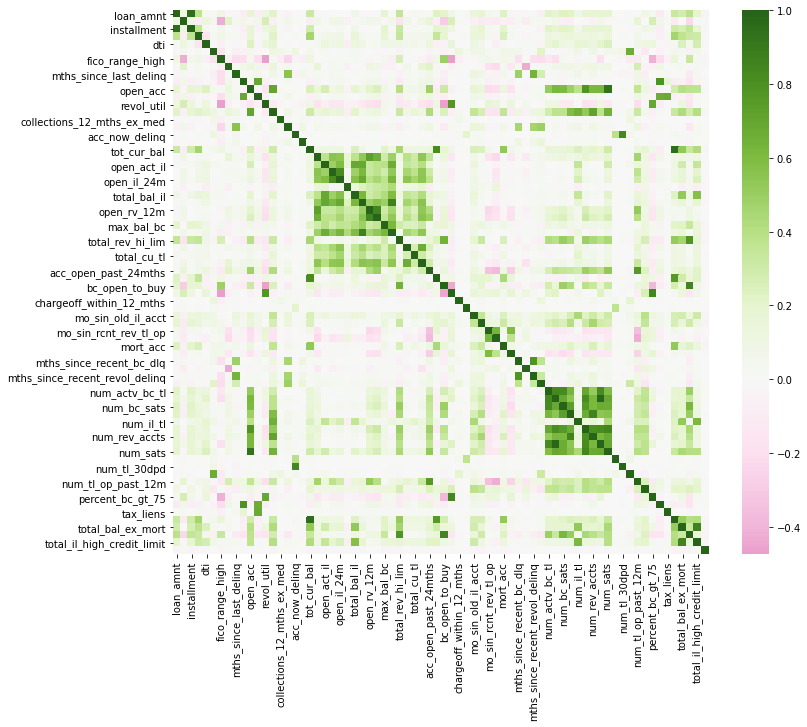

In [8]:
plt.subplots(figsize=(12,10))
sns.heatmap(wrangled_data[wrangled_data['loan_status'] == 'Fully Paid'].corr(), center=0, cmap="PiYG")

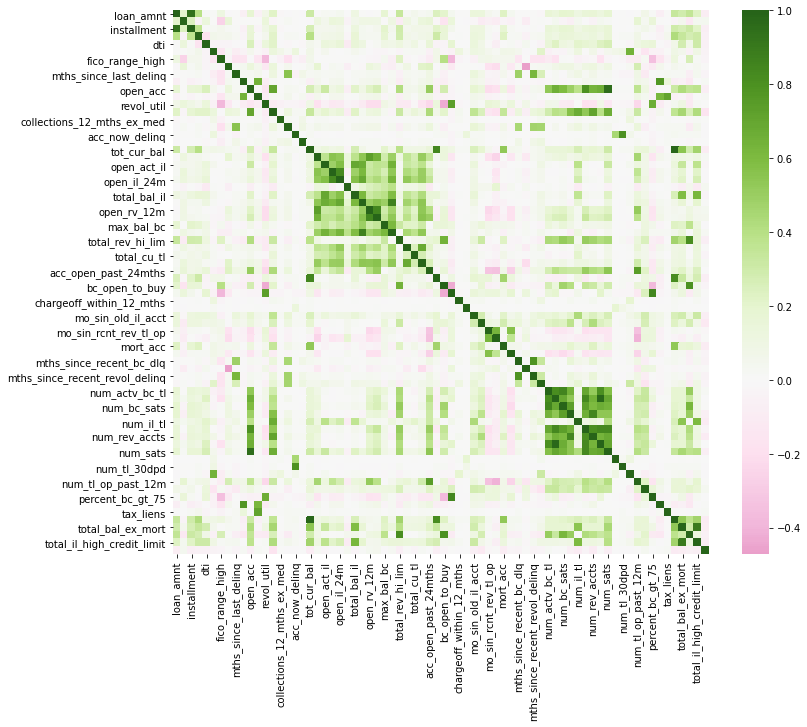

In [9]:
plt.subplots(figsize=(12,10))
sns.heatmap(wrangled_data[wrangled_data['loan_status'] == 'Charged Off'].corr(), center=0, cmap="PiYG")

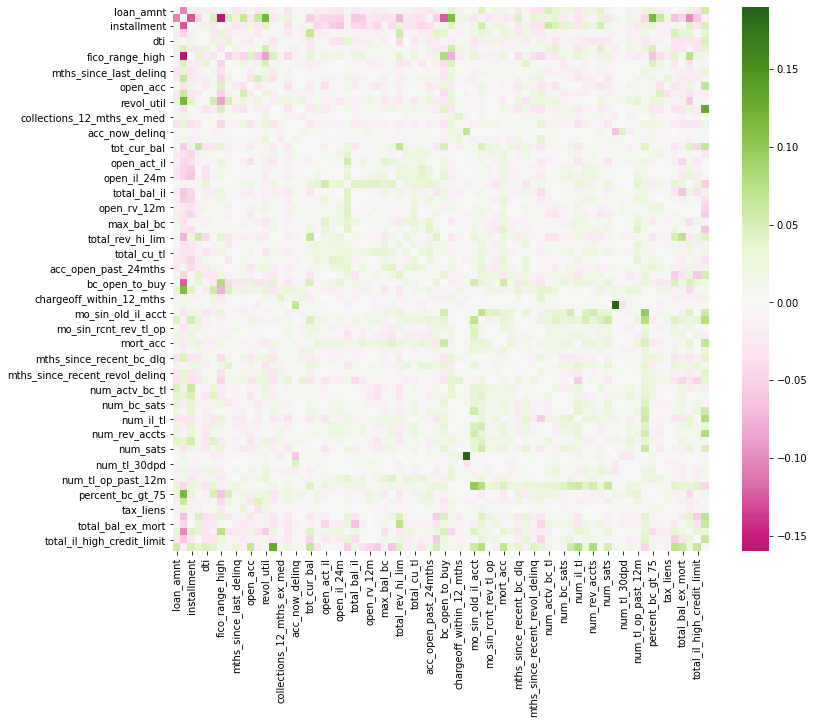

In [10]:
# difference in corr() values from fully paid to charged off

difference = wrangled_data[wrangled_data['loan_status'] == 'Fully Paid'].corr() - wrangled_data[wrangled_data['loan_status'] == 'Charged Off'].corr()

plt.subplots(figsize=(12,10))
sns.heatmap(difference, center=0, cmap="PiYG")

# positive means Fully Paid is more correlated
# negative means Charged Off is more correlated

In [11]:
# difficult to see trends with this many features...

# make violin plots for each numeric feature side-by-side (Fully Paid - Charged Off)

# Create dataframes for 'Fully Paid' and 'Charged Off' for future use

In [12]:
fully_paid_df = wrangled_data[wrangled_data['loan_status'] == 'Fully Paid']

charged_off_df = wrangled_data[wrangled_data['loan_status'] == 'Charged Off']

# Review numeric columns for outliers

In [13]:
wrangled_data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,last_fico_range
count,99984.000000,99984.000000,99984.000000,9.998400e+04,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,9.998400e+04,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,99984.000000,9.998400e+04,99984.000000,99984.000000,99984.000000,99984.000000
mean,14884.527024,14.175595,449.282927,7.378014e+04,18.962329,0.335314,697.063140,0.695941,17.103637,12.750850,11.711224,0.226556,52.927694,24.879071,0.018863,11.956323,0.005671,215.348186,1.271287e+05,0.458693,1.179009,0.335294,0.750780,7.760362,15132.918197,26.298828,0.619199,1.320931,2262.376220,24.982537,29940.031415,0.478577,0.663956,1.014342,4.769853,11968.141163,8890.576302,58.813105,0.009271,14.961094,115.396123,169.565761,11.921707,7.176598,1.511962,21.758131,9.586884,5.736108,12.046077,0.501600,3.550368,5.554999,4.590534,7.671787,8.237478,8.014412,13.891183,5.500550,11.317311,0.000820,0.003741,0.090775,2.180949,89.790602,45.072516,0.141313,0.054219,1.569739e+05,48138.626620,19897.662726,40307.047738,33.877510
std,8779.887649,4.991077,262.679517,5.596521e+04,10.200508,0.920927,29.992807,0.964599,23.018642,29.503344,5.541414,0.618066,24.275190,12.071136,0.150626,22.428238,0.084137,1703.525856,1.495120e+05,0.965170,2.390546,0.763751,1.428953,18.323133,32968.070464,37.389059,1.265522,2.382307,4260.659726,32.322337,31179.018130,1.197758,1.973060,2.057414,3.354383,15405.168615,14130.619135,30.057061,0.108931,729.713520,60.603996,99.648100,15.515197,8.458025,1.940262,29.384077,20.305740,5.823182,21.295713,1.320376,2.374090,3.525505,3.049726,4.975554,7.572601,4.829185,8.481487,3.438204,5.876765,0.034922,0.067726,0.519834,1.910488,21.400747,36.470284,0.385810,0.410730,1.702348e+05,46709.906071,20651.909473,42568.642418,117.885967
min,500.000000,5.310000,15.690000,1.000000e+03,0.000000,0.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [14]:
numeric_cols = list(wrangled_data.select_dtypes('float').columns)
numeric_cols



['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sat

Mean Difference:   Negative --> fully paid is larger
-1.253185020835602
Median Difference:
2.0


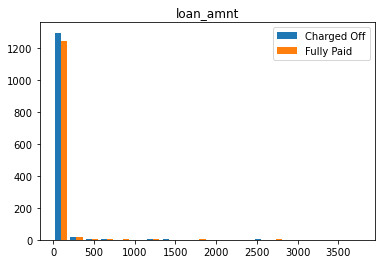

Mean Difference:   Negative --> fully paid is larger
-0.6979149302907928
Median Difference:
3.0


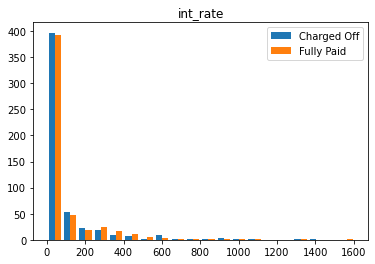

Mean Difference:   Negative --> fully paid is larger
-0.2529472079819315
Median Difference:
0.0


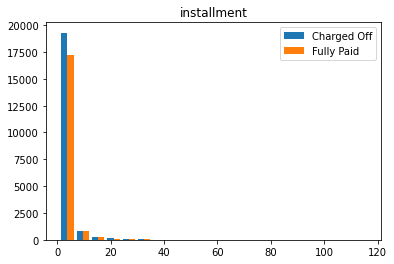

Mean Difference:   Negative --> fully paid is larger
-0.33236499611141745
Median Difference:
0.0


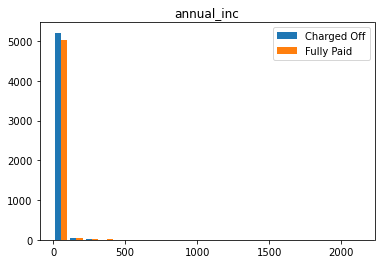

Mean Difference:   Negative --> fully paid is larger
-0.4200694647603278
Median Difference:
0.0


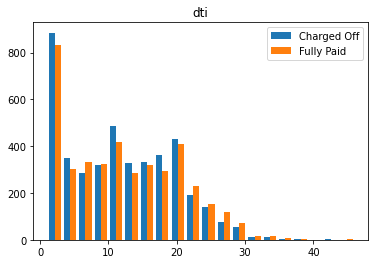

Mean Difference:   Negative --> fully paid is larger
119.32142857142844
Median Difference:
10.0


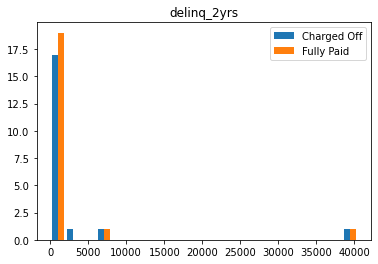

Mean Difference:   Negative --> fully paid is larger
35.71621621621625
Median Difference:
-347.0


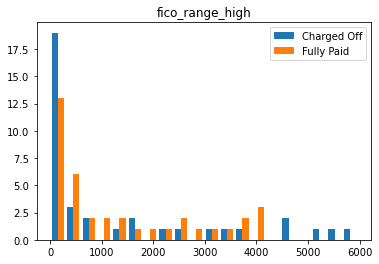

Mean Difference:   Negative --> fully paid is larger
0.6666666666669698
Median Difference:
297.0


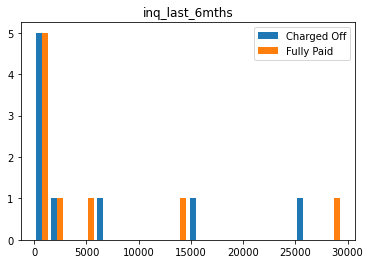

Mean Difference:   Negative --> fully paid is larger
-15.612220916568731
Median Difference:
-1.0


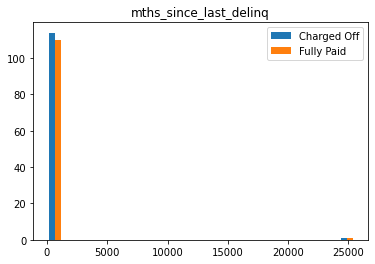

Mean Difference:   Negative --> fully paid is larger
0.04918032786883941
Median Difference:
10.0


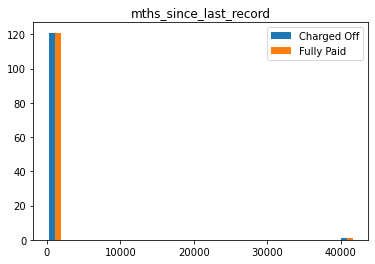

Mean Difference:   Negative --> fully paid is larger
-75.64090909090908
Median Difference:
-43.0


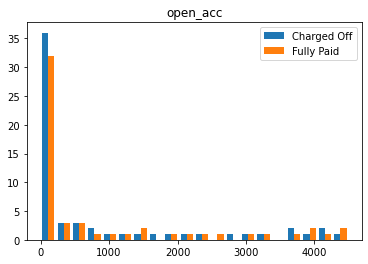

Mean Difference:   Negative --> fully paid is larger
-207.9124999999999
Median Difference:
-5.5


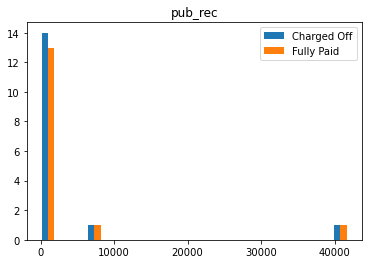

Mean Difference:   Negative --> fully paid is larger
-0.34501599147121453
Median Difference:
-1.0


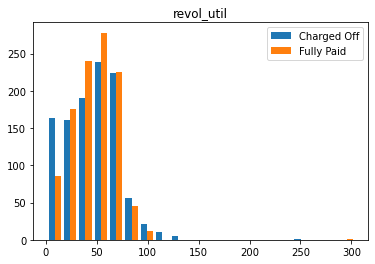

Mean Difference:   Negative --> fully paid is larger
5.110000000000014
Median Difference:
7.0


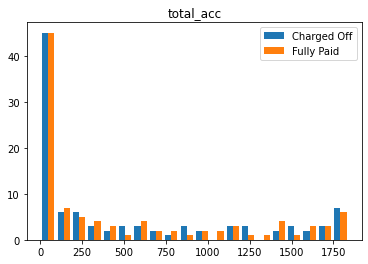

Mean Difference:   Negative --> fully paid is larger
1.0
Median Difference:
9.5


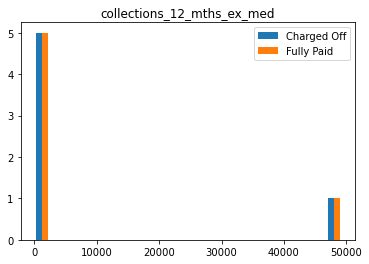

Mean Difference:   Negative --> fully paid is larger
-21.144573205200686
Median Difference:
12.0


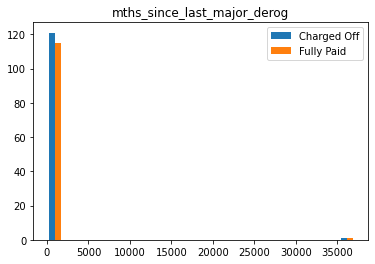

Mean Difference:   Negative --> fully paid is larger
-1665.2999999999993
Median Difference:
-10.5


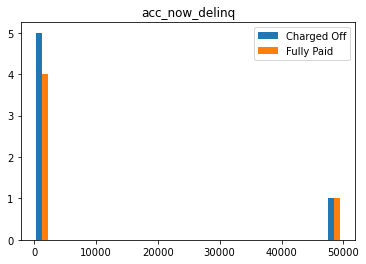

Mean Difference:   Negative --> fully paid is larger
-1.7417168816702748
Median Difference:
0.0


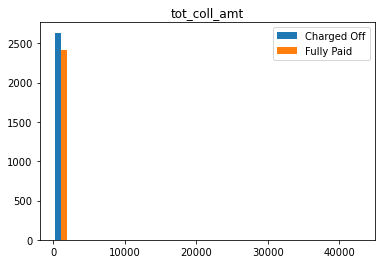

Mean Difference:   Negative --> fully paid is larger
0.012551904669313663
Median Difference:
0.0


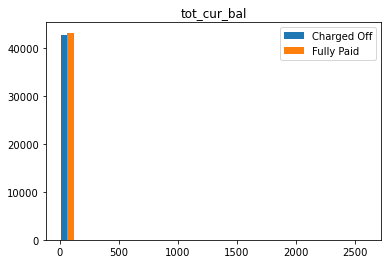

Mean Difference:   Negative --> fully paid is larger
-832.75
Median Difference:
-65.0


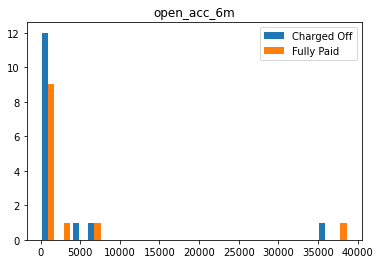

Mean Difference:   Negative --> fully paid is larger
-133.72767857142867
Median Difference:
1.0


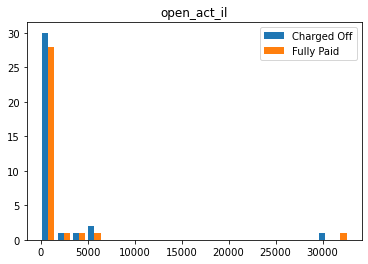

Mean Difference:   Negative --> fully paid is larger
-319.98076923076906
Median Difference:
-4.0


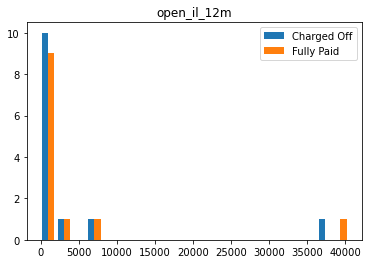

Mean Difference:   Negative --> fully paid is larger
227.52272727272748
Median Difference:
40.0


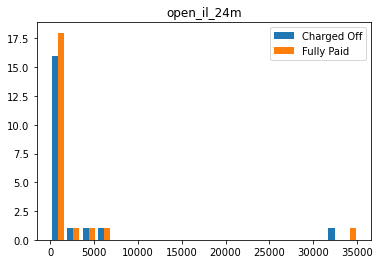

Mean Difference:   Negative --> fully paid is larger
-12.229529905098218
Median Difference:
-1.0


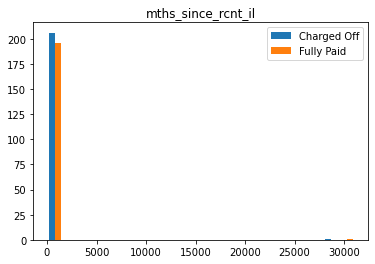

Mean Difference:   Negative --> fully paid is larger
-0.40449073808683034
Median Difference:
0.0


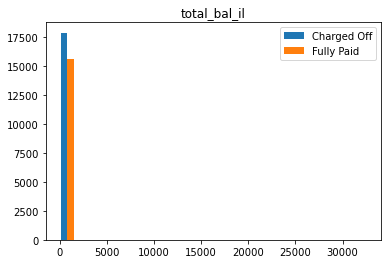

Mean Difference:   Negative --> fully paid is larger
-20.062828947368416
Median Difference:
-10.5


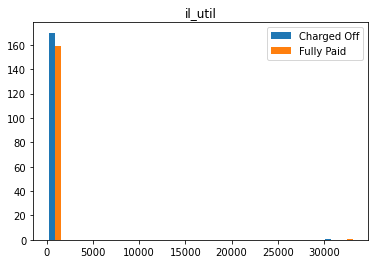

Mean Difference:   Negative --> fully paid is larger
0.3333333333334849
Median Difference:
18.0


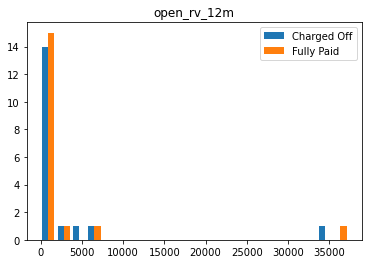

Mean Difference:   Negative --> fully paid is larger
-270.32142857142867
Median Difference:
-10.0


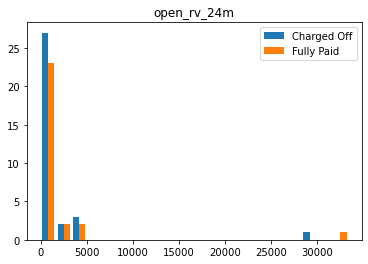

Mean Difference:   Negative --> fully paid is larger
-0.038240216536451044
Median Difference:
1.0


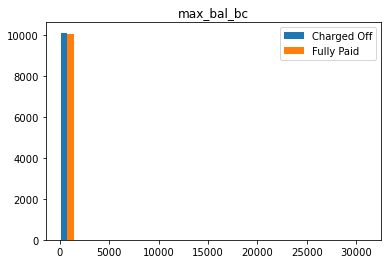

Mean Difference:   Negative --> fully paid is larger
-26.627080665813025
Median Difference:
-30.5


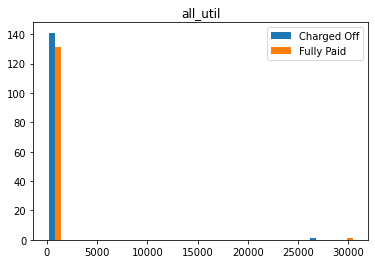

Mean Difference:   Negative --> fully paid is larger
0.4805196813516499
Median Difference:
0.0


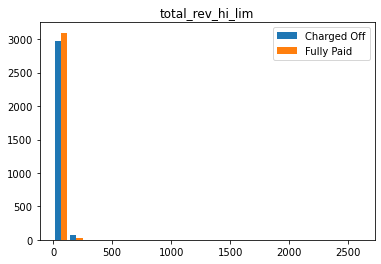

Mean Difference:   Negative --> fully paid is larger
250.8872180451126
Median Difference:
42.0


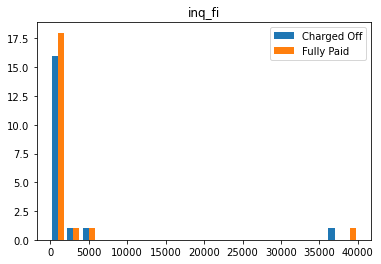

Mean Difference:   Negative --> fully paid is larger
-86.38961038961043
Median Difference:
-6.0


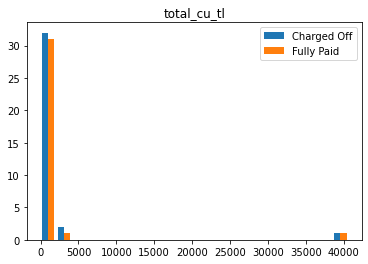

Mean Difference:   Negative --> fully paid is larger
-449.4692653673162
Median Difference:
-22.0


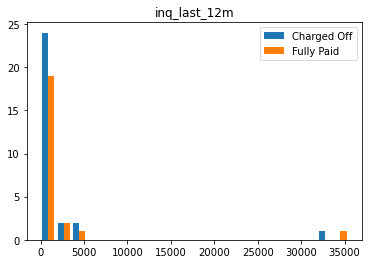

Mean Difference:   Negative --> fully paid is larger
-35.39615931721187
Median Difference:
30.5


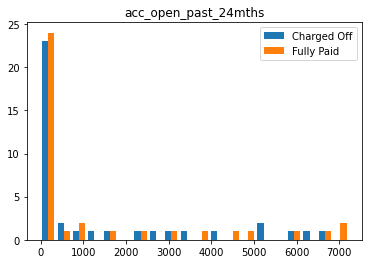

Mean Difference:   Negative --> fully paid is larger
0.2814575474603891
Median Difference:
0.0


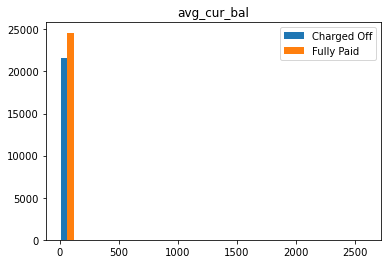

Mean Difference:   Negative --> fully paid is larger
0.4458260822713256
Median Difference:
0.0


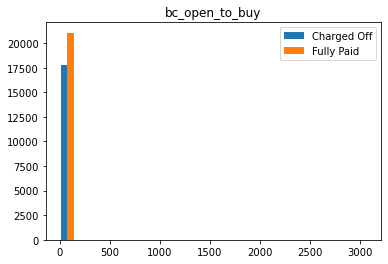

Mean Difference:   Negative --> fully paid is larger
-0.5898210246438396
Median Difference:
-2.0


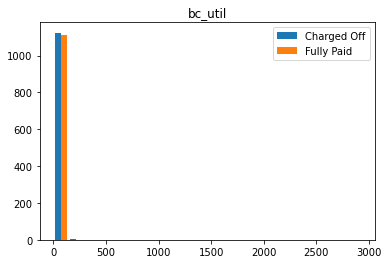

Mean Difference:   Negative --> fully paid is larger
-1665.2999999999993
Median Difference:
-14.5


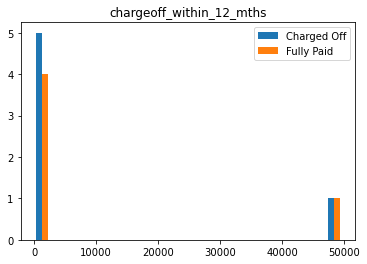

Mean Difference:   Negative --> fully paid is larger
-4.570354226778761
Median Difference:
0.0


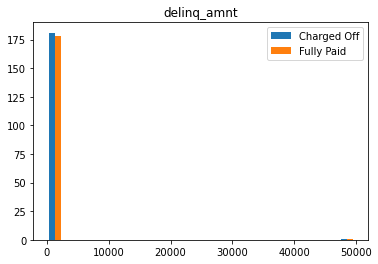

Mean Difference:   Negative --> fully paid is larger
-6.567402344974596
Median Difference:
-11.0


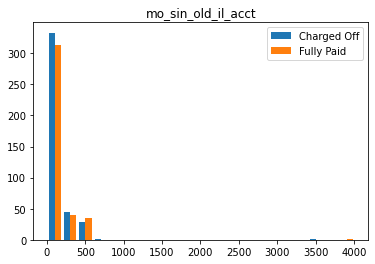

Mean Difference:   Negative --> fully paid is larger
-3.61025943396227
Median Difference:
-8.5


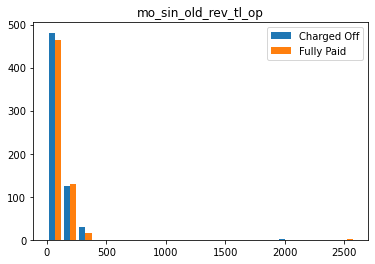

Mean Difference:   Negative --> fully paid is larger
8.947058823529403
Median Difference:
-11.5


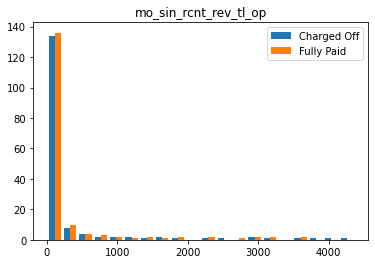

Mean Difference:   Negative --> fully paid is larger
3.672099087353331
Median Difference:
-3.5


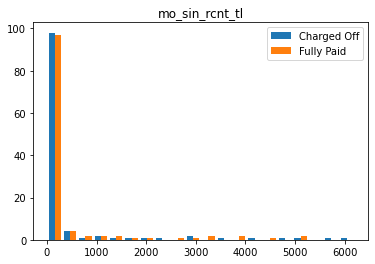

Mean Difference:   Negative --> fully paid is larger
381.15428571428583
Median Difference:
30.0


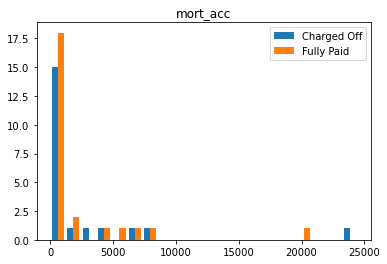

Mean Difference:   Negative --> fully paid is larger
8.227083333333354
Median Difference:
-3.0


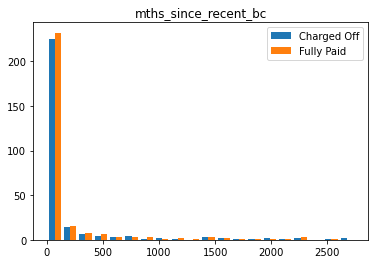

Mean Difference:   Negative --> fully paid is larger
-31.306986591390228
Median Difference:
8.0


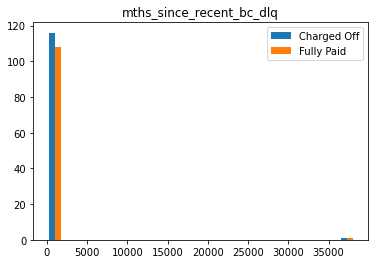

Mean Difference:   Negative --> fully paid is larger
-76.67538461538447
Median Difference:
-209.0


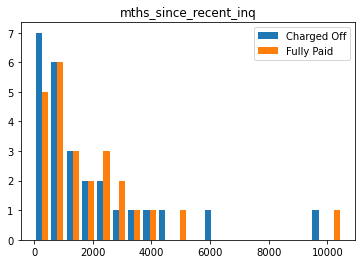

Mean Difference:   Negative --> fully paid is larger
-18.06195652173915
Median Difference:
-0.5


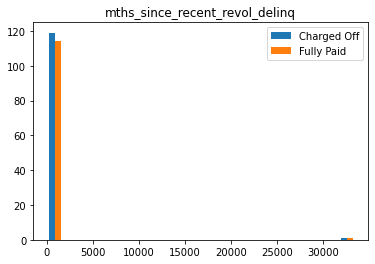

Mean Difference:   Negative --> fully paid is larger
-214.02428571428572
Median Difference:
-6.5


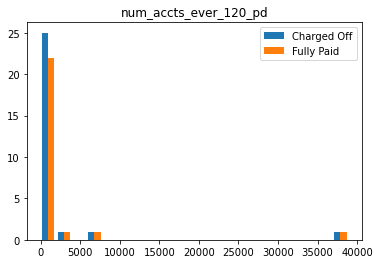

Mean Difference:   Negative --> fully paid is larger
-159.99038461538453
Median Difference:
-31.5


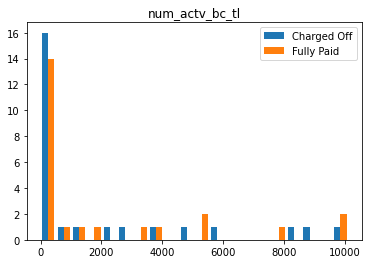

Mean Difference:   Negative --> fully paid is larger
-232.89510489510485
Median Difference:
-79.0


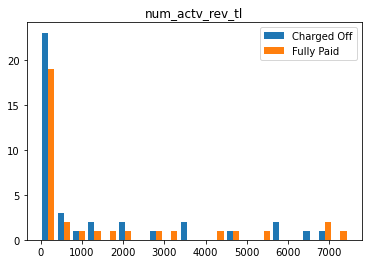

Mean Difference:   Negative --> fully paid is larger
-41.8361344537816
Median Difference:
-21.0


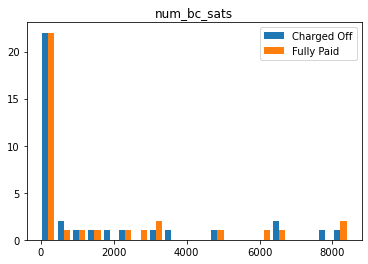

Mean Difference:   Negative --> fully paid is larger
66.66415261756879
Median Difference:
42.0


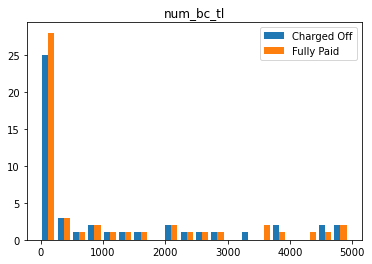

Mean Difference:   Negative --> fully paid is larger
-34.56548856548852
Median Difference:
-5.0


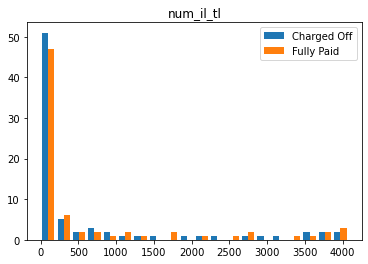

Mean Difference:   Negative --> fully paid is larger
-86.81739130434778
Median Difference:
-33.5


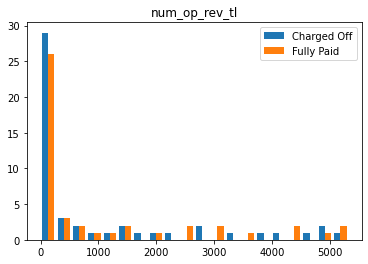

Mean Difference:   Negative --> fully paid is larger
-53.330128205128176
Median Difference:
-50.0


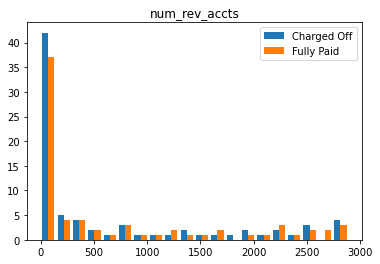

Mean Difference:   Negative --> fully paid is larger
-173.40625
Median Difference:
-52.0


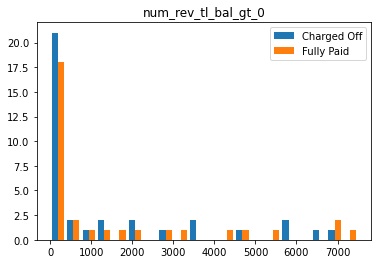

Mean Difference:   Negative --> fully paid is larger
-59.410714285714334
Median Difference:
-40.5


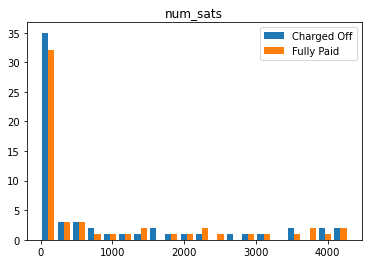

Mean Difference:   Negative --> fully paid is larger
-4164.25
Median Difference:
-22.0


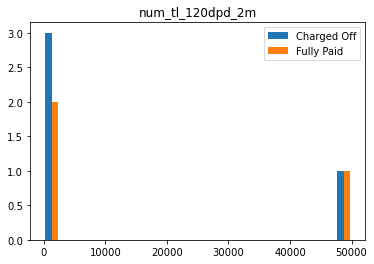

Mean Difference:   Negative --> fully paid is larger
2500.9500000000007
Median Difference:
69.0


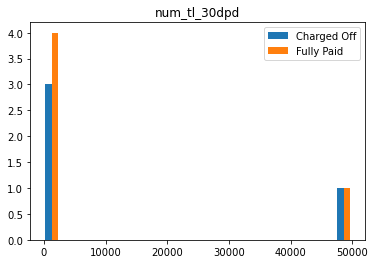

Mean Difference:   Negative --> fully paid is larger
163.71568627451006
Median Difference:
2.0


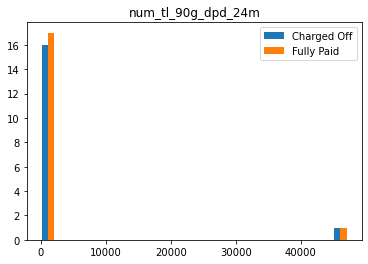

Mean Difference:   Negative --> fully paid is larger
-325.7543478260868
Median Difference:
-42.5


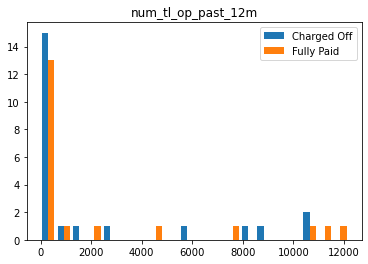

Mean Difference:   Negative --> fully paid is larger
-3.483433217544004
Median Difference:
-2.0


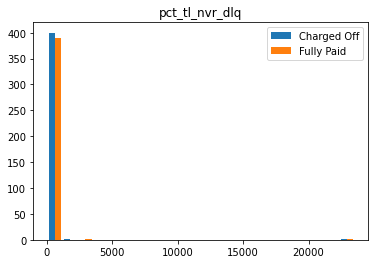

Mean Difference:   Negative --> fully paid is larger
-14.414612981603625
Median Difference:
0.0


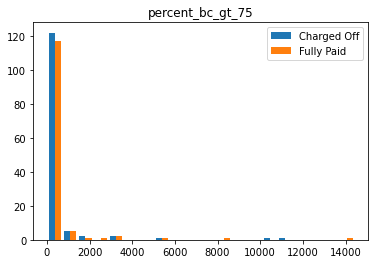

Mean Difference:   Negative --> fully paid is larger
-891.9107142857147
Median Difference:
-13.0


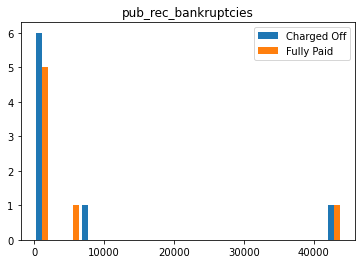

Mean Difference:   Negative --> fully paid is larger
513.169230769231
Median Difference:
6.0


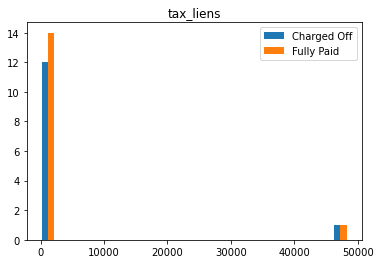

Mean Difference:   Negative --> fully paid is larger
0.01469352658850065
Median Difference:
0.0


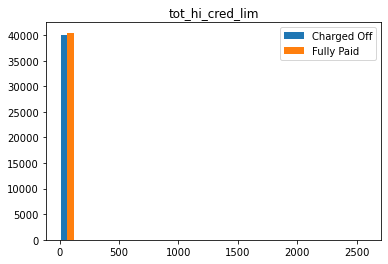

Mean Difference:   Negative --> fully paid is larger
-0.011288029863053328
Median Difference:
0.0


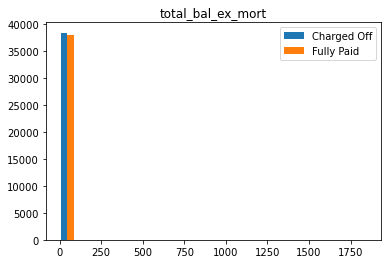

Mean Difference:   Negative --> fully paid is larger
0.7175831466238272
Median Difference:
0.0


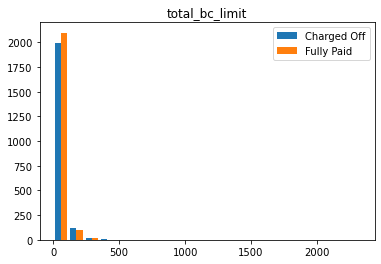

Mean Difference:   Negative --> fully paid is larger
-0.036909401946348286
Median Difference:
0.0


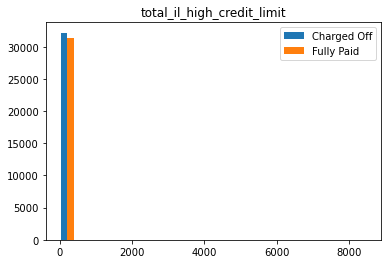

Mean Difference:   Negative --> fully paid is larger
1.5
Median Difference:
2786.0


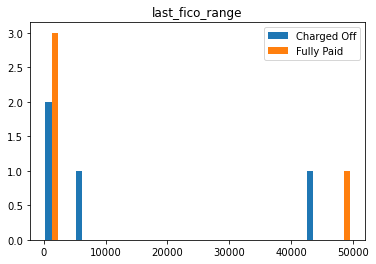

In [15]:
for i in numeric_cols:
    charged_off = pd.DataFrame(charged_off_df.groupby(by=i)['loan_status'].count().reset_index().values, columns=[i, 'Charged Off Count'])
    fully_paid = pd.DataFrame(fully_paid_df.groupby(by=i)['loan_status'].count().reset_index().values, columns=[i, 'Fully Paid Count'])
    
    # create x and y data
    x1 = charged_off[i]
    X = np.arange(len(x1))
    
    y1 = charged_off['Charged Off Count']
    y2 = fully_paid['Fully Paid Count']

    # data to plot
    n_groups = len(x1)

    # create plot
    fig, ax = plt.subplots(1, 1, 'all')
    bar_width = 0.35
    opacity = 0.8

    # create mean summary
    print('Mean Difference:' + '   Negative --> fully paid is larger')
    print(np.mean(y1) - np.mean(y2))
    print('Median Difference:')
    print(np.median(y1) - np.median(y2))
    
    # create over-layed bar chart
    plt.hist([y1, y2], bins=20, label=['Charged Off', 'Fully Paid'])
    plt.legend(loc='upper right')
    plt.title(str(i))
    plt.show()
    
    

# Object datatype analysis:

In [16]:
object_cols = list(wrangled_data.select_dtypes('object').columns)
object_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_credit_pull_d',
 'application_type',
 'debt_settlement_flag']

In [17]:
fully_paid_df = wrangled_data[wrangled_data['loan_status'] == 'Fully Paid']

charged_off_df = wrangled_data[wrangled_data['loan_status'] == 'Charged Off']

In [18]:
cols = ['grade',
 'sub_grade',
 'emp_length',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'debt_settlement_flag',
  'term']

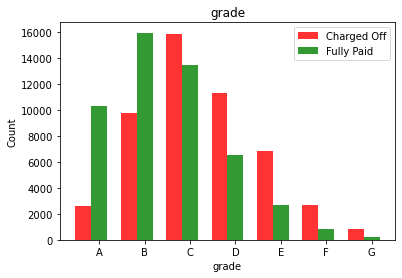

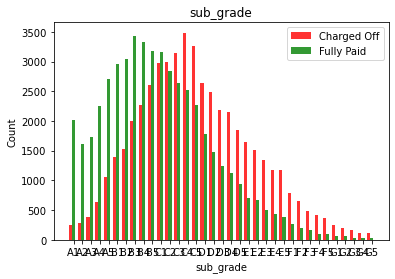

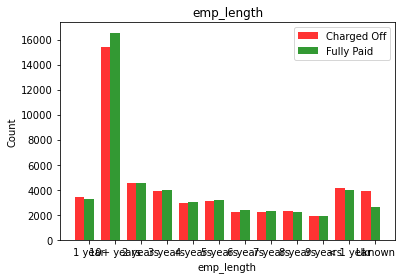

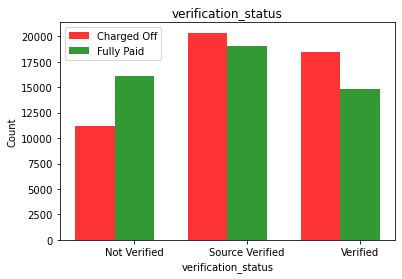

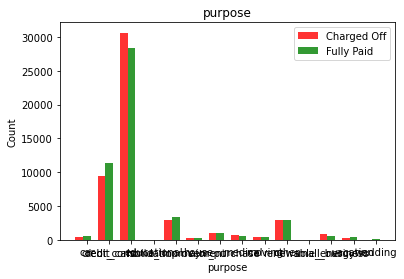

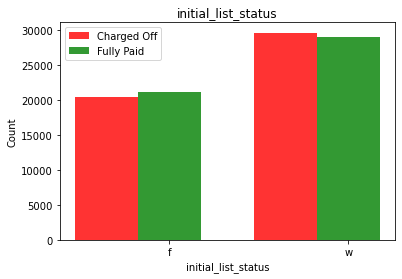

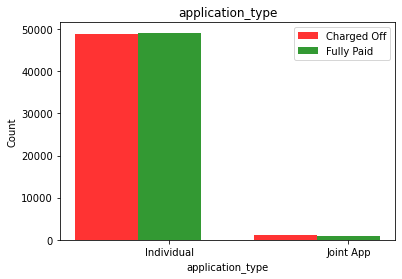

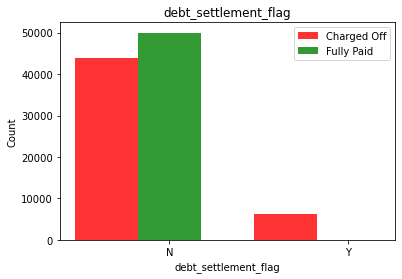

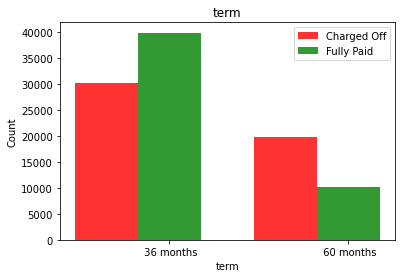

In [19]:
for i in cols:
    charged_off = pd.DataFrame(charged_off_df.groupby(by=i)['loan_status'].count().reset_index().values, columns=[i, 'Charged Off Count'])
    fully_paid = pd.DataFrame(fully_paid_df.groupby(by=i)['loan_status'].count().reset_index().values, columns=[i, 'Fully Paid Count'])
    
    # create x and y data
    x1 = charged_off[i]
    X = np.arange(len(x1))
    
    y1 = charged_off['Charged Off Count']
    y2 = fully_paid['Fully Paid Count']

    # data to plot
    n_groups = len(x1)

    # create plot
    fig, ax = plt.subplots()
    bar_width = 0.35
    opacity = 0.8

    ax1 = plt.bar(X,y1, bar_width,alpha=opacity,color='r',label='Charged Off')

    ax2 = plt.bar(X + bar_width, y2, bar_width,alpha=opacity,color='g',label='Fully Paid')
    
#    plt.figure(figsize=(1,1))
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(i)
    plt.xticks(X + bar_width, x1)
    plt.legend()
    plt.show()
    
    

In [20]:
remaining_obj_features = list(np.setdiff1d(object_cols,cols))
remaining_obj_features

['addr_state',
 'earliest_cr_line',
 'emp_title',
 'home_ownership',
 'issue_d',
 'last_credit_pull_d',
 'loan_status',
 'zip_code']

# addr_state:

In [21]:
paid = list(fully_paid_df['addr_state'].unique())

paid.sort()


In [22]:
len(fully_paid_df['addr_state'].value_counts())

51

In [23]:
charged = list(charged_off_df['addr_state'].unique())

charged.sort()


In [24]:
len(charged_off_df['addr_state'].value_counts())

50

In [25]:
additional_state = list(np.setdiff1d(paid,charged))

additional_state

['IA']

In [26]:
# there is an additional state in Fully Paid. Investigate

# DC is added as a state which brings the total to 51
# IA is not in the charged off list


In [27]:
charged_off = pd.DataFrame(charged_off_df.groupby(by='addr_state')['loan_status'].count().reset_index().values, columns=['addr_state', 'Charged Off Count'])
charged_off

,addr_state,Charged Off Count
0,AK,115
1,AL,729
2,AR,431
3,AZ,1133
4,CA,7129
5,CO,858
6,CT,660
7,DC,77
8,DE,127
9,FL,3800


In [28]:
# add IA with count 0

new_row = {'addr_state':'IA', 'Charged Off Count':0}

#append row to the dataframe
charged_off = charged_off.append(new_row, ignore_index=True)

charged_off

,addr_state,Charged Off Count
0,AK,115
1,AL,729
2,AR,431
3,AZ,1133
4,CA,7129
5,CO,858
6,CT,660
7,DC,77
8,DE,127
9,FL,3800


In [29]:
fully_paid = pd.DataFrame(fully_paid_df.groupby(by='addr_state')['loan_status'].count().reset_index().values, columns=['addr_state', 'Fully Paid Count'])
fully_paid

,addr_state,Fully Paid Count
0,AK,112
1,AL,593
2,AR,350
3,AZ,1223
4,CA,7355
5,CO,1163
6,CT,750
7,DC,143
8,DE,138
9,FL,3415


In [30]:
address_df = pd.merge(fully_paid, charged_off, on = 'addr_state', how = 'inner')

address_df

,addr_state,Fully Paid Count,Charged Off Count
0,AK,112,115
1,AL,593,729
2,AR,350,431
3,AZ,1223,1133
4,CA,7355,7129
5,CO,1163,858
6,CT,750,660
7,DC,143,77
8,DE,138,127
9,FL,3415,3800


In [31]:
address_df['Percent Paid'] = address_df['Fully Paid Count'] / (address_df['Fully Paid Count'] + address_df['Charged Off Count'])

address_df.sort_values(by='Percent Paid', inplace=True, ascending=False)

address_df

,addr_state,Fully Paid Count,Charged Off Count,Percent Paid
12,IA,1,0,1
7,DC,143,77,0.65
21,ME,78,47,0.624
50,WY,134,83,0.617512
46,VT,96,65,0.596273
37,OR,642,441,0.592798
30,NH,247,172,0.589499
47,WA,1164,828,0.584337
5,CO,1163,858,0.575458
40,SC,608,482,0.557798


In [32]:
# this shows which states pay back their loans. Good to know. 

# home_ownership

In [33]:
fully_paid = pd.DataFrame(fully_paid_df.groupby(by='home_ownership')['loan_status'].count().reset_index().values, columns=['home_ownership', 'Fully Paid Count'])
fully_paid

,home_ownership,Fully Paid Count
0,ANY,19
1,MORTGAGE,25654
2,NONE,1
3,OWN,5314
4,RENT,19001


In [34]:
charged_off = pd.DataFrame(charged_off_df.groupby(by='home_ownership')['loan_status'].count().reset_index().values, columns=['home_ownership', 'Charged Off Count'])
charged_off

,home_ownership,Charged Off Count
0,ANY,10
1,MORTGAGE,21205
2,NONE,1
3,OTHER,4
4,OWN,5615
5,RENT,23160


In [35]:
ownership_df = pd.merge(fully_paid, charged_off, on = 'home_ownership', how = 'inner')

ownership_df

,home_ownership,Fully Paid Count,Charged Off Count
0,ANY,19,10
1,MORTGAGE,25654,21205
2,NONE,1,1
3,OWN,5314,5615
4,RENT,19001,23160


In [36]:
ownership_df['Percent Paid'] = ownership_df['Fully Paid Count'] / (ownership_df['Fully Paid Count'] + ownership_df['Charged Off Count'])

ownership_df.sort_values(by='Percent Paid', inplace=True, ascending=False)

ownership_df

,home_ownership,Fully Paid Count,Charged Off Count,Percent Paid
0,ANY,19,10,0.655172
1,MORTGAGE,25654,21205,0.547472
2,NONE,1,1,0.5
3,OWN,5314,5615,0.486229
4,RENT,19001,23160,0.450677


In [37]:
# there is a slight difference between mortage and renting
# suprisingly owning is worse at paying off than with a mortage!

# 'emp_title'

In [38]:
# there are a lot of job titles. Sort by

emp_list = list(wrangled_data['emp_title'].head(100))



In [39]:
# I want to know if any emplyment titles are overwelmingly one sided (fully paid or charged off)

In [40]:
d = pd.DataFrame()

for i in emp_list:
    temp = pd.DataFrame(
        {
            'Employment Title': i,
            'Fully Paid Count': fully_paid_df[['emp_title']].eq(i).sum(),
            'Charged Off Count': charged_off_df[['emp_title']].eq(i).sum()
        }
    )
    
    d = pd.concat([d, temp])
    
d.set_index('Employment Title')


,Fully Paid Count,Charged Off Count
Employment Title,,
Truck driver,44,70
cook,14,19
Underwriting Director,3,0
Service Manager,35,32
ABM,1,0
Assistant Controller,8,3
Cross dock coordinator,1,0
Systems Engineer II,2,1
Legal Assistant,44,39


In [41]:
d['Percent Paid'] = d['Fully Paid Count'] / (d['Fully Paid Count'] + d['Charged Off Count'])

d.sort_values(by='Percent Paid', inplace=True)

d

,Employment Title,Fully Paid Count,Charged Off Count,Percent Paid
emp_title,Site Manager,8,13,0.380952
emp_title,Custodian,18,29,0.382979
emp_title,Truck driver,44,70,0.385965
emp_title,Claims Examiner,7,10,0.411765
emp_title,Uknown,2945,4182,0.413217
emp_title,Uknown,2945,4182,0.413217
emp_title,Uknown,2945,4182,0.413217
emp_title,Uknown,2945,4182,0.413217
emp_title,Uknown,2945,4182,0.413217
emp_title,Uknown,2945,4182,0.413217


In [42]:
# not sure how to deal with so many titles

# create list of high charge off titles, label them 1 and all others 0?

# Zip Code

In [43]:
# remove zip code - geographic trends will be covered by state

del wrangled_data['zip_code']

# Estimating loan maturity (length)

In [44]:
# loan maturity will take the place of earliest credit line and last credit pulled

wrangled_data['earliest_cr_line']

Loan ID
1592860    Feb-1996
1019497    Oct-2003
2072955    Sep-2003
1278099    Oct-2001
1870253    Sep-1983
             ...   
1799091    Aug-1990
1757121    Feb-2001
2009904    Oct-2001
11366      Jun-1989
236560     Jan-2005
Name: earliest_cr_line, Length: 99984, dtype: object

In [45]:
# convert to year
from datetime import datetime, timedelta

wrangled_data['earliest_cr_line'] = pd.to_datetime(wrangled_data['earliest_cr_line'])
wrangled_data['credit_maturity'] = (datetime.now() - wrangled_data['earliest_cr_line']).dt.days


In [46]:
wrangled_data['credit_maturity']

Loan ID
1592860     9106
1019497     6307
2072955     6337
1278099     7037
1870253    13642
           ...  
1799091    11116
1757121     7279
2009904     7037
11366      11542
236560      5849
Name: credit_maturity, Length: 99984, dtype: int64

In [47]:
wrangled_data.shape

(99984, 89)

In [48]:
del wrangled_data['earliest_cr_line']

del wrangled_data['last_credit_pull_d']

In [49]:
wrangled_data.shape

(99984, 87)

In [50]:
# no rows were removed. 3 columns were removed

# All columns show usable information. Some are more useful than others. Modeling will provide insight.

In [52]:
wrangled_data.to_csv('EDA_second_capstone.csv', index=True)